In [1]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os
import os.path
import fnmatch
from pathlib import Path
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models, losses, Model, optimizers
from sklearn.utils import shuffle
from tensorflow.keras.initializers import RandomUniform
import datetime as dt
from PIL import Image
import time
import glob


# ECG Image Dataset 
Here I load and read the data, then label each folder with its respective name:


*   **MI**
*   **HMI**
*   **AbnHB**
*   **Normal**


## Task 0 : Loading & Reading the ECG Image Dataset
## Task 1 : Cropping ECG Images &&  Background Removal
## Task 2 : Extracting 12 Leads of ECG Signal Image
## Task 3 : GLCM & Feature Extraction


### AB

# Task 0

In [2]:
print('Getting ECG Images')
!wget "https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/gwbz3fsgp8-2.zip"

Getting ECG Images
--2021-08-08 16:38:18--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/gwbz3fsgp8-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.20.163
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.20.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203349349 (194M) [application/octet-stream]
Saving to: ‘gwbz3fsgp8-2.zip’

gwbz3fsgp8-2.zip    100%[===================>] 193.93M  30.4MB/s    in 7.1s    

2021-08-08 16:38:26 (27.5 MB/s) - ‘gwbz3fsgp8-2.zip’ saved [203349349/203349349]



In [ ]:
!unzip gwbz3fsgp8-2.zip -d /kaggle/working/ECG_IM/
print("Done Unzipping into /ECG_IM/ folder")

In [4]:
# MI patients data
ECG_MI_dir_ = Path('./ECG_IM/ECG Images of Myocardial Infarction Patients (240x12=2880)')

# Filepaths:
ECG_MI_filepaths = list(ECG_MI_dir_.glob(r'**/*.jpg'))

# filename
MI_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/ECG Images of Myocardial Infarction Patients (240x12=2880)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        MI_fnames.append(filename)
# Mapping the labels
MI_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_MI_filepaths))
# Paths & labels 
ECG_MI_filepaths = pd.Series(ECG_MI_filepaths, name = 'filepath').astype(str)
MI_fnames = pd.Series(MI_fnames, name='filename')
MI_labels = pd.Series(MI_labels, name='label')

# Concatenating...
MI_df = pd.concat([MI_fnames,ECG_MI_filepaths, MI_labels], axis=1)
MI_df['label'] = "MI"

In [5]:
MI_df.head(3)

,filename,filepath,label
0,MI(227).jpg,ECG_IM/ECG Images of Myocardial Infarction Pat...,MI
1,MI(36).jpg,ECG_IM/ECG Images of Myocardial Infarction Pat...,MI
2,MI(152).jpg,ECG_IM/ECG Images of Myocardial Infarction Pat...,MI


Text(0.5, 1.0, 'label: MI ,filename: MI(227).jpg')

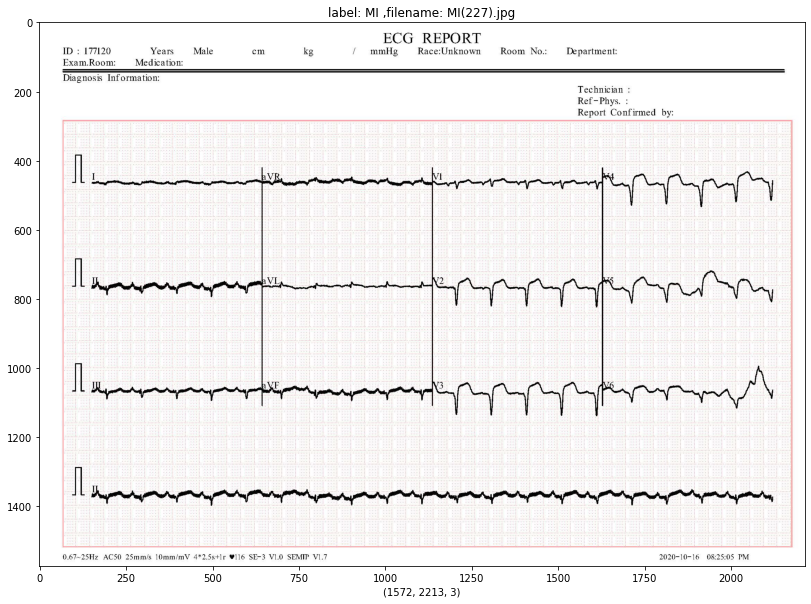

In [6]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(MI_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+MI_df["label"][0]+str(' ,filename: ') +str(MI_df['filename'][0]))

In [7]:
# HMI patients data
ECG_HMI_dir_ = Path('./ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)')
#FilePath
ECG_HMI_filepaths = list(ECG_HMI_dir_.glob(r'**/*.jpg'))
# filename
HMI_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/ECG Images of Patient that have History of MI (172x12=2064)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        HMI_fnames.append(filename)

# Mapping the labels
HMI_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_HMI_filepaths))

# Filepath & labels
ECG_HMI_filepaths = pd.Series(ECG_HMI_filepaths, name = 'filepath').astype(str)
HMI_fnames = pd.Series(HMI_fnames, name='filename')
HMI_labels = pd.Series(HMI_labels, name='label')

# Concatenating...
HMI_df = pd.concat([HMI_fnames,ECG_HMI_filepaths, HMI_labels], axis=1)
HMI_df['label'] = "HMI"

Text(0.5, 1.0, 'label: HMI ,filename: PMI(76).jpg')

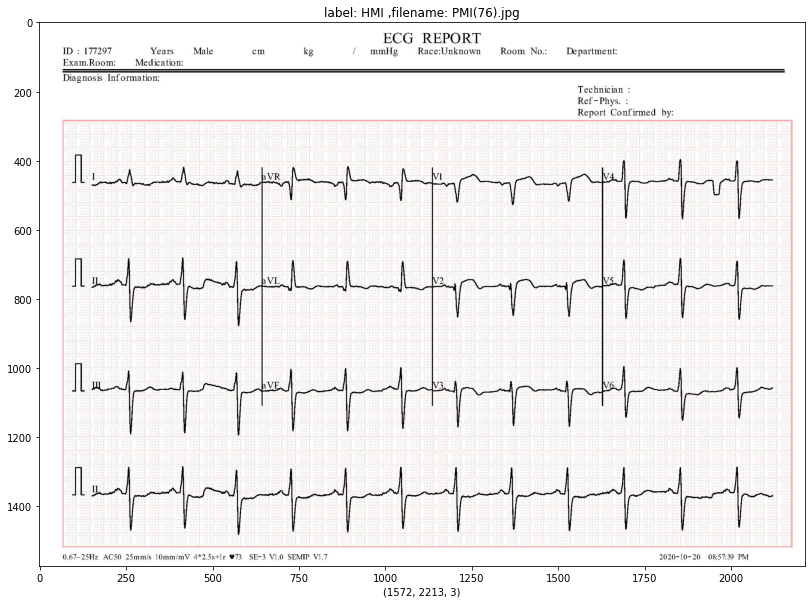

In [8]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(HMI_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+HMI_df["label"][0]+str(' ,filename: ') +str(HMI_df['filename'][0]))

In [9]:
# AbnHB patients data
ECG_AbnHB_dir_ = Path('./ECG_IM/ECG Images of Patient that have abnormal heartbeat (233x12=2796)')

#Filepath
ECG_AbnHB_filepaths = list(ECG_HMI_dir_.glob(r'**/*.jpg'))

# filename
AbnHB_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        AbnHB_fnames.append(filename)
# Mapping the labels
AbnHB_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_AbnHB_filepaths))

# Filepaths & labels 
ECG_AbnHB_filepaths = pd.Series(ECG_AbnHB_filepaths, name = 'filepath').astype(str)
AbnHB_fnames = pd.Series(AbnHB_fnames, name='filename')
AbnHB_labels = pd.Series(AbnHB_labels, name='label')

# Concatenating...
AbnHB_df = pd.concat([AbnHB_fnames,ECG_AbnHB_filepaths, AbnHB_labels], axis=1)
AbnHB_df['label'] = "ABNORMAL"

Text(0.5, 1.0, 'label: ABNORMAL ,filename: HB(100).jpg')

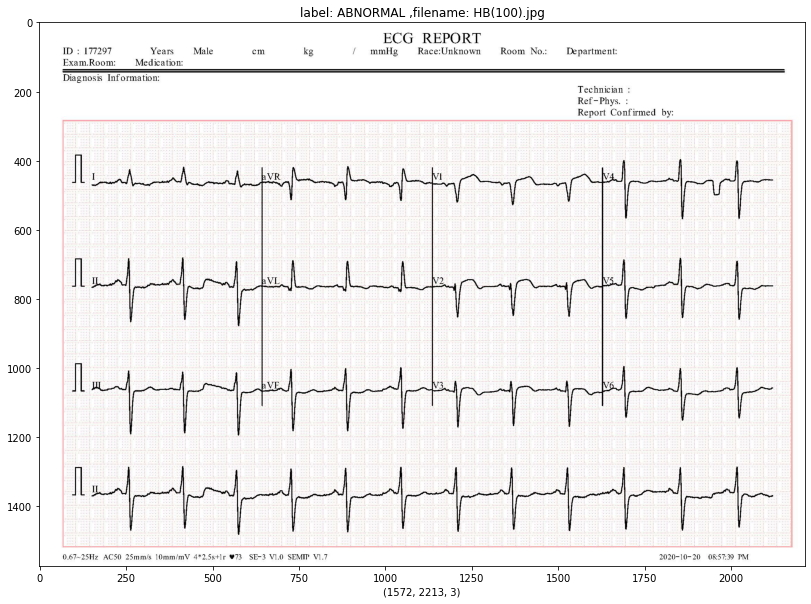

In [10]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(AbnHB_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+AbnHB_df["label"][0]+str(' ,filename: ') +str(AbnHB_df['filename'][0]))

In [12]:
# Normal patients data
ECG_Normal_dir_ = Path('./ECG_IM/Normal Person ECG Images (284x12=3408)')
#Filepath
ECG_Normal_filepaths = list(ECG_Normal_dir_.glob(r'**/*.jpg'))

# filename
Normal_fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./ECG_IM/Normal Person ECG Images (284x12=3408)/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        #print(filename)
        Normal_fnames.append(filename)
        
# Mapping the labels
Normal_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], ECG_Normal_filepaths))
# Paths & labels femalee eyes
ECG_Normal_filepaths = pd.Series(ECG_Normal_filepaths, name = 'filepath').astype(str)
Normal_fnames = pd.Series(Normal_fnames, name='filename')
Normal_labels = pd.Series(Normal_labels, name='label')

# Concatenating...
Normal_df = pd.concat([Normal_fnames,ECG_Normal_filepaths, Normal_labels], axis=1)
Normal_df['label'] = "NORMAL"

Text(0.5, 1.0, 'label: NORMAL ,filename: Normal(271).jpg')

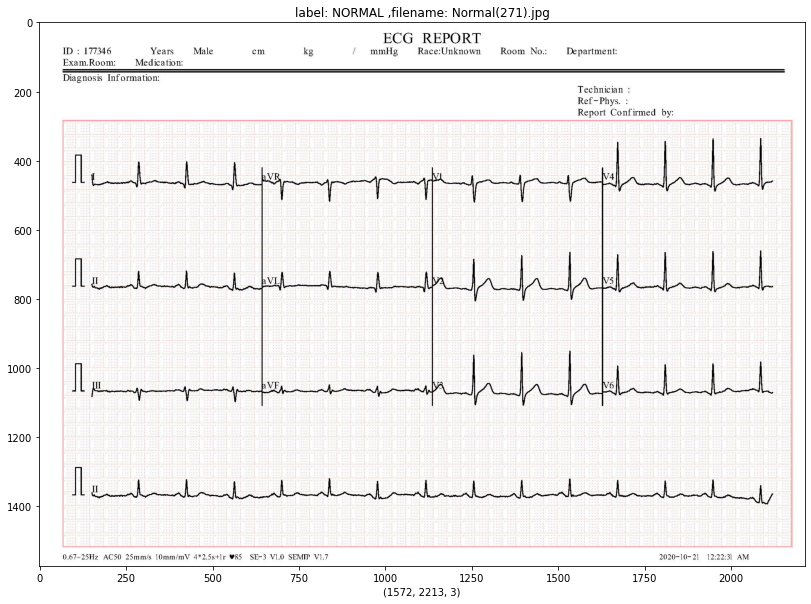

In [13]:
# Image Example of MI
figure = plt.figure(figsize=(20,10))
x = plt.imread(Normal_df["filepath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(str('label: ')+Normal_df["label"][0]+str(' ,filename: ') +str(Normal_df['filename'][0]))

# Task 1:

In [14]:
def im_crop(image,left=71.5, top= 287.5, right=2102, bottom= 1228):
    """ This function is used to crop the image and get just the ECG signals.
      input: 
        image : the image (jpg,png,...Etc)
        left: location in left of image
        top: location in top of image
        right: location in right of image
        bottom: location in bottom of image

        ######
        # choices from paper: left=71.5, top= 287.5, right=2102, bottom= 1228
        ######
      output: 
        img_out: the cropped ECG image.
  """
    img = Image.open(image)
    img_out = img.crop((left, top, right, bottom))
  

    return img_out



def bg_remover(image,name):
  
    # The Image will be of type PIL.Image.Image , so we will convert it to np.asarray:
    img = np.asarray(image)
    
    # convert to graky
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold input image as mask
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # negate mask
    mask = 255 - mask

    # apply morphology to remove isolated extraneous noise
    # use borderconstant of black since foreground touches the edges
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # anti-alias the mask -- blur then stretch
    # blur alpha channel
    mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

    # linear stretch so that 127.5 goes to 0, but 255 stays 255
    mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

    # put mask into alpha channel
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    result[:, :, 3] = mask

    # save resulting masked image
    cv2.imwrite('/kaggle/working/outECG/'+ str(name), result)
    result = Image.fromarray(result)
    
    return result

In [15]:
# Output folder for the respective categories of ECG Images after Cropping & Background Removal
!mkdir /kaggle/working/outECG/
!mkdir /kaggle/working/outECG/MI_c_bg/
!mkdir /kaggle/working/outECG/HMI_c_bg/
!mkdir /kaggle/working/outECG/AbnHB_c_bg/
!mkdir /kaggle/working/outECG/Normal_c_bg/

In [16]:
%%time
# MI images
MI_c_bg= []
for i in range(0,MI_df.shape[0]):
    MI_c_bg.append(bg_remover(im_crop(MI_df["filepath"][i]),'MI_c_bg/' + str(MI_df["filename"][i])))



CPU times: user 27.6 s, sys: 1.3 s, total: 28.9 s
Wall time: 26.3 s


In [17]:
%%time
# HMI images
HMI_c_bg= []
for i in range(0,HMI_df.shape[0]):
    HMI_c_bg.append(bg_remover(im_crop(HMI_df["filepath"][i]),'HMI_c_bg/' + str(HMI_df["filename"][i])))

CPU times: user 20 s, sys: 920 ms, total: 21 s
Wall time: 19.1 s


In [19]:
%%time
# Normal images
Normal_c_bg= []
for i in range(0,Normal_df.shape[0]):
    Normal_c_bg.append(bg_remover(im_crop(Normal_df["filepath"][i]), 'Normal_c_bg/' + str(Normal_df["filename"][i])))


CPU times: user 31.7 s, sys: 1.62 s, total: 33.3 s
Wall time: 30.3 s


In [27]:
%%time
# Abnormal HB images
AbnHB_c_bg= []
for i in range(0,AbnHB_df.shape[0]):
    AbnHB_c_bg.append(bg_remover(im_crop(AbnHB_df["filepath"][i]),'AbnHB_c_bg/' + str(AbnHB_df["filename"][i]) ))


AttributeError: 'float' object has no attribute 'read'

# Need Help for this Folder when I arrives at i==172 it gives this Error Message.

In [ ]:
# to test the images were well saved...
fnames = []
for path, dirs, files in os.walk(os.path.abspath(r"./outECG/AbnHB_c_bg/")):
    for filename in fnmatch.filter(files, "*.jpg"):
        print(filename)
        fnames.append(filename)


In [44]:
# Error Saving these Images.....
for i in range(172,233):
    print(AbnHB_df["filename"][i])

HB(106).jpg
HB(110).jpg
HB(39).jpg
HB(187).jpg
HB(194).jpg
HB(30).jpg
HB(193).jpg
HB(174).jpg
HB(5).jpg
HB(96).jpg
HB(127).jpg
HB(138).jpg
HB(231).jpg
HB(126).jpg
HB(23).jpg
HB(55).jpg
HB(67).jpg
HB(103).jpg
HB(121).jpg
HB(40).jpg
HB(97).jpg
HB(171).jpg
HB(93).jpg
HB(129).jpg
HB(199).jpg
HB(137).jpg
HB(61).jpg
HB(198).jpg
HB(73).jpg
HB(154).jpg
HB(2).jpg
HB(27).jpg
HB(203).jpg
HB(64).jpg
HB(31).jpg
HB(77).jpg
HB(166).jpg
HB(211).jpg
HB(54).jpg
HB(163).jpg
HB(71).jpg
HB(130).jpg
HB(191).jpg
HB(113).jpg
HB(179).jpg
HB(220).jpg
HB(105).jpg
HB(62).jpg
HB(124).jpg
HB(11).jpg
HB(165).jpg
HB(217).jpg
HB(104).jpg
HB(91).jpg
HB(53).jpg
HB(159).jpg
HB(189).jpg
HB(41).jpg
HB(184).jpg
HB(78).jpg
HB(223).jpg


# Task 2: 

* Function to Extract the 12 Leads.

I will try to Place each lead into its respective Repository, any Idea how to do it ?

In [ ]:
def img_seg_12leads(image, width= 315, height= 315):
    """ This function is used to crop the image and get 12 leads of  the ECG signals.
      input: 
        image : the image cropped of ECG Signal
        width = 315
        height = 315

        ######
        # choices from paper & repo : https://github.com/mkfzdmr/COVID-19-ECG-Classification
        ######
      output: 
        12 img_out: 12 leads ECG
    """

    # With ECG 12leads order 
    I_img   = image.crop((120.5, 0.5, width + 120.5 , 0.5 + height)).convert('L') # Converting Images to Grayscale 
    II_img  = image.crop((120.5, 315.5, width + 120.5 , 315.5+ height)).convert('L')
    III_img = image.crop((120.5, 630.5, width + 120.5 , 630.5+ height)).convert('L')
    aVL_img = image.crop((672.5, 315.5, width + 672.5 , 315.5+ height)).convert('L')
    aVR_img = image.crop((672.5, 0.5, width + 672.5 , 0.5 + height)).convert('L')
    aVF_img = image.crop((672.5, 630.5, width + 672.5 , 630.5+ height)).convert('L')
    V1_img  = image.crop((1133.5, 0.5, width + 1133.5 , 0.5+ height)).convert('L')
    V2_img  = image.crop((1133.5, 315.5, width + 1133.5 , 315.5+ height)).convert('L')
    V3_img  = image.crop((1133.5, 630.5, width + 1133.5 , 630.5+ height)).convert('L')
    V4_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5 + height)).convert('L')
    V5_img  = image.crop((1639.5, 0.5, width + 1639.5 , 0.5+ height)).convert('L')
    V6_img  = image.crop((1639.5, 630.5, width + 1639.5 , 630.5+ height)).convert('L')

    plt.figure(figsize=(20,10))
    plt.subplot(4,4,1)
    plt.imshow(image)
    plt.title("Original")

    plt.subplot(4,4,2)
    plt.imshow(I_img)
    plt.title("I Lead")
  
    plt.subplot(4,4,3)
    plt.imshow(II_img)
    plt.title("II Lead")

    plt.subplot(4,4,4)
    plt.imshow(III_img)
    plt.title("III Lead")

    plt.subplot(4,4,5)
    plt.imshow(V1_img)
    plt.title("V1 Lead")

    plt.subplot(4,4,6)
    plt.imshow(V2_img)
    plt.title("V2 Lead")

    plt.subplot(4,4,7)
    plt.imshow(V3_img)
    plt.title("V3 Lead")

    plt.subplot(4,4,8)
    plt.imshow(V4_img)
    plt.title("V4 Lead")

    plt.subplot(4,4,9)
    plt.imshow(V5_img)
    plt.title("V5 Lead")

    plt.subplot(4,4,10)
    plt.imshow(V6_img)
    plt.title("V6 Lead")

    plt.subplot(4,4,11)
    plt.imshow(aVR_img)
    plt.title("aVR Lead")

    plt.subplot(4,4,12)
    plt.imshow(aVL_img)
    plt.title("aVL Lead")

    plt.subplot(4,4,13)
    plt.imshow(aVF_img)
    plt.title("aVF Lead")

    plt.show()

    
    
    return I_img,II_img,III_img,aVR_img,aVL_img, aVF_img,V1_img,V2_img,V3_img,V4_img,V5_img,V6_img

In [ ]:
%%time
#Example : 
I_img,II_img,III_img,aVR_img,aVL_img, aVF_img,V1_img,V2_img,V3_img,V4_img,V5_img,V6_img = img_seg_12leads(img_res)

# Task 3:

* GLCM Functions



In [ ]:
def fast_glcm(img, vmin=0, vmax=255, nbit=8, kernel_size=5):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float32)
    return glcm


def fast_glcm_mean(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm mean
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    return mean


def fast_glcm_std(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm std
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    std2 = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            std2 += (glcm[i,j] * i - mean)**2

    std = np.sqrt(std2)
    return std


def fast_glcm_contrast(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm contrast
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    cont = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            cont += glcm[i,j] * (i-j)**2

    return cont


def fast_glcm_dissimilarity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm dissimilarity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    diss = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            diss += glcm[i,j] * np.abs(i-j)

    return diss


def fast_glcm_homogeneity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm homogeneity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    homo = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            homo += glcm[i,j] / (1.+(i-j)**2)

    return homo


def fast_glcm_ASM(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm asm, energy
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    asm = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            asm  += glcm[i,j]**2

    ene = np.sqrt(asm)
    return asm, ene


def fast_glcm_max(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm max
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    max_  = np.max(glcm, axis=(0,1))
    return max_


def fast_glcm_entropy(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm entropy
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    pnorm = glcm / np.sum(glcm, axis=(0,1)) + 1./ks**2
    ent  = np.sum(-pnorm * np.log(pnorm), axis=(0,1))
    return ent

In [ ]:
# Conveting PIL.Image.Image to np Array.
# reference : https://app.pluralsight.com/guides/importing-image-data-into-numpy-arrays
img = np.asarray(I_img)
print(type(img))
plt.imshow(img)
img.shape

In [ ]:
mean = fast_glcm_mean(img)
std = fast_glcm_std(img)
cont = fast_glcm_contrast(img)
diss = fast_glcm_dissimilarity(img)
homo = fast_glcm_homogeneity(img)
asm, ene = fast_glcm_ASM(img)
ma = fast_glcm_max(img)
ent = fast_glcm_entropy(img)

plt.figure(figsize=(10,4.5))
fs = 15
plt.subplot(2,5,1)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(img)
plt.title('I_lead original', fontsize=fs)

plt.subplot(2,5,2)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(mean)
plt.title('I_lead mean', fontsize=fs)

plt.subplot(2,5,3)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(std)
plt.title('I_lead std', fontsize=fs)

plt.subplot(2,5,4)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(cont)
plt.title('I_lead contrast', fontsize=fs)

plt.subplot(2,5,5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(diss)
plt.title('I_lead dissimilarity', fontsize=fs)

plt.subplot(2,5,6)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(homo)
plt.title('I_lead homogeneity', fontsize=fs)

plt.subplot(2,5,7)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(asm)
plt.title('I_lead ASM', fontsize=fs)

plt.subplot(2,5,8)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ene)
plt.title('I_lead energy', fontsize=fs)

plt.subplot(2,5,9)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ma)
plt.title('I_lead max', fontsize=fs)

plt.subplot(2,5,10)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ent)
plt.title('I_lead entropy', fontsize=fs)

plt.tight_layout(pad=0.8)
plt.savefig('I_lead_output.jpg')
plt.show()